In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [33]:
large = 30; med = 14; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (20, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
sns.set_style("white")

In [34]:
df = pd.read_csv('data/tripadvisor_review.csv')

# rename columns as their short names
cols_dict = {
	"Category 1": "AG", # art galleries
	"Category 2": "DC", # dance clubs
	"Category 3": "JB", # juice bars
	"Category 4": "RS", # restaurants
	"Category 5": "MU", # museums
	"Category 6": "RE", # resorts
	"Category 7": "PP", # parks/picnic spots
	"Category 8": "BE", # beaches
	"Category 9": "TH", # theaters
	"Category 10": "RI", # religious institutions
}
df.rename(columns=cols_dict, inplace=True)

df.head()

,User ID,AG,DC,JB,RS,MU,RE,PP,BE,TH,RI
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [35]:
# drop User ID column
df.drop(['User ID'], axis=1, inplace=True)
df.head()

,AG,DC,JB,RS,MU,RE,PP,BE,TH,RI
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


# PCA

### Here we will lower the number of dimensions of our data using PCA, because our data have a lot of dimensions (10 features), so our algorithm could work in a wrong way.

In [36]:
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df)
df_pca.shape

(980, 2)

In [37]:
df_pca = pd.DataFrame(df_pca, columns=['PCA 1', 'PCA 2'])

In [38]:
df_pca.head()

,PCA 1,PCA 2
0,1.391408,-0.063253
1,2.225649,0.660561
2,-0.677268,-0.512645
3,-0.849739,0.132922
4,0.420059,0.202708


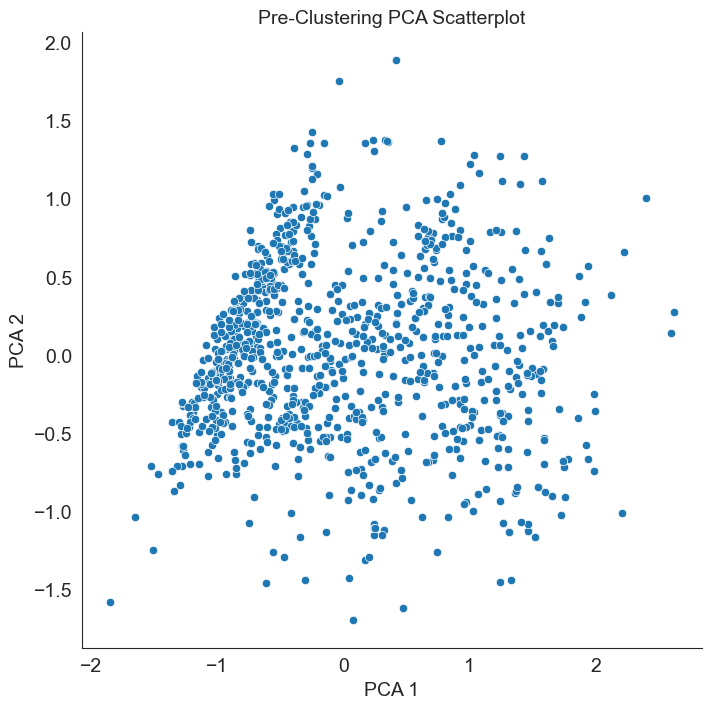

In [39]:
cluster_fig = plt.figure(figsize=(8, 8))

cluster_fig = sns.scatterplot(x='PCA 1', y='PCA 2', data=df_pca)

sns.despine()
cluster_fig.set_xlabel('PCA 1')
cluster_fig.set_ylabel('PCA 2')
cluster_fig.set_title('Pre-Clustering PCA Scatterplot')
plt.show()

# K-Means Clustering

### Here we will use the K-Means algorithm to cluster our data. We will use the elbow method to find the best number of clusters.

In [40]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit_transform(df_pca)
df_pca['KMeans Clusters'] = kmeans.labels_
df_pca.head()

c:\Users\yasin\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,PCA 1,PCA 2,KMeans Clusters
0,1.391408,-0.063253,0
1,2.225649,0.660561,0
2,-0.677268,-0.512645,1
3,-0.849739,0.132922,1
4,0.420059,0.202708,2


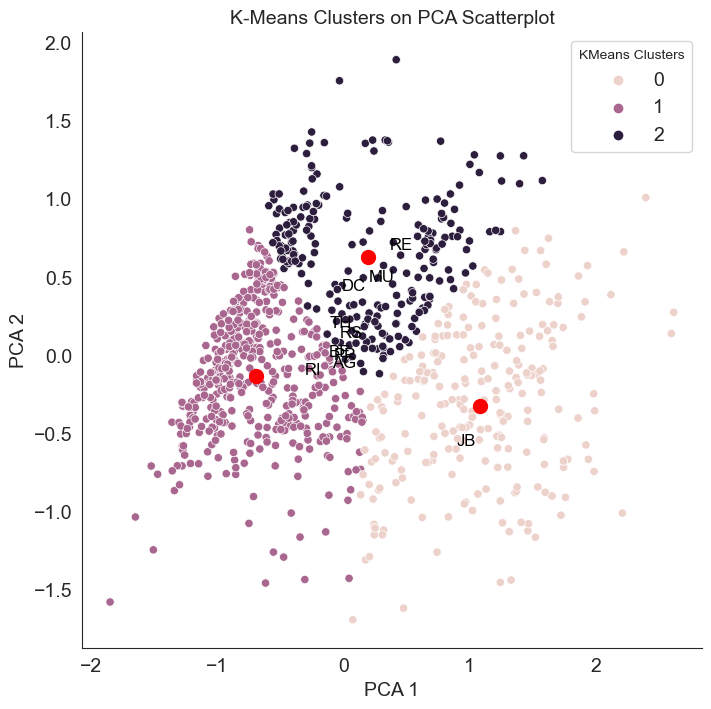

In [43]:
cluster_fig = plt.figure(figsize=(8, 8))
cluster_fig = sns.scatterplot(x='PCA 1', y='PCA 2', hue='KMeans Clusters', data=df_pca)
cluster_fig.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='r', label='Centroids')

coefficients = np.transpose(pca.components_[0:2, :])
n = coefficients.shape[0]
columns = list(df.columns)

for i in range(n):
	plt.text(coefficients[i, 0]*1.15, coefficients[i, 1]*1.15, columns[i], size='large', color='k', ha='center', va='center')
 
sns.despine()
cluster_fig.set_xlabel('PCA 1')
cluster_fig.set_ylabel('PCA 2')
cluster_fig.set_title('K-Means Clusters on PCA Scatterplot')
plt.show()

# AGNES

### Here we will use the AGNES algorithm to cluster our data. We will use the elbow method to find the best number of clusters.

In [44]:
agnes = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agnes.fit_predict(df_pca)
df_pca['Agnes Clusters'] = agnes.labels_
df_pca.head()

,PCA 1,PCA 2,KMeans Clusters,Agnes Clusters
0,1.391408,-0.063253,0,1
1,2.225649,0.660561,0,1
2,-0.677268,-0.512645,1,0
3,-0.849739,0.132922,1,0
4,0.420059,0.202708,2,2


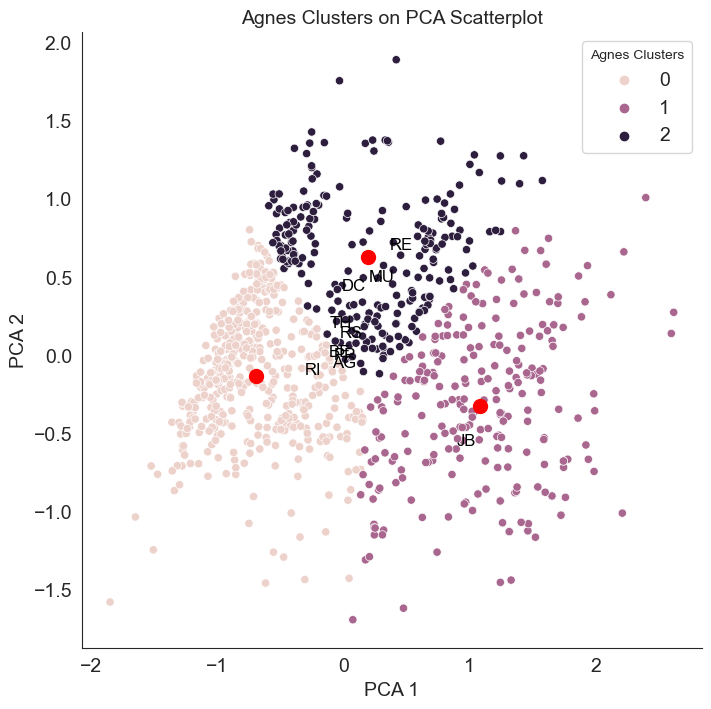

In [45]:
cluster_fig = plt.figure(figsize=(8, 8))
cluster_fig = sns.scatterplot(x='PCA 1', y='PCA 2', hue='Agnes Clusters', data=df_pca)
cluster_fig.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='r', label='Centroids')

coefficients = np.transpose(pca.components_[0:2, :])
n = coefficients.shape[0]
columns = list(df.columns)

for i in range(n):
	plt.text(coefficients[i, 0]*1.15, coefficients[i, 1]*1.15, columns[i], size='large', color='k', ha='center', va='center')
 
sns.despine()
cluster_fig.set_xlabel('PCA 1')
cluster_fig.set_ylabel('PCA 2')
cluster_fig.set_title('Agnes Clusters on PCA Scatterplot')
plt.show()

# DBSCAN

### Here we will use the DBSCAN algorithm to cluster our data. We will use the elbow method to find the best number of clusters.

In [46]:
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan.fit_predict(df_pca)
df_pca['DBSCAN Clusters'] = dbscan.labels_
df_pca.head()

,PCA 1,PCA 2,KMeans Clusters,Agnes Clusters,DBSCAN Clusters
0,1.391408,-0.063253,0,1,0
1,2.225649,0.660561,0,1,0
2,-0.677268,-0.512645,1,0,1
3,-0.849739,0.132922,1,0,1
4,0.420059,0.202708,2,2,2


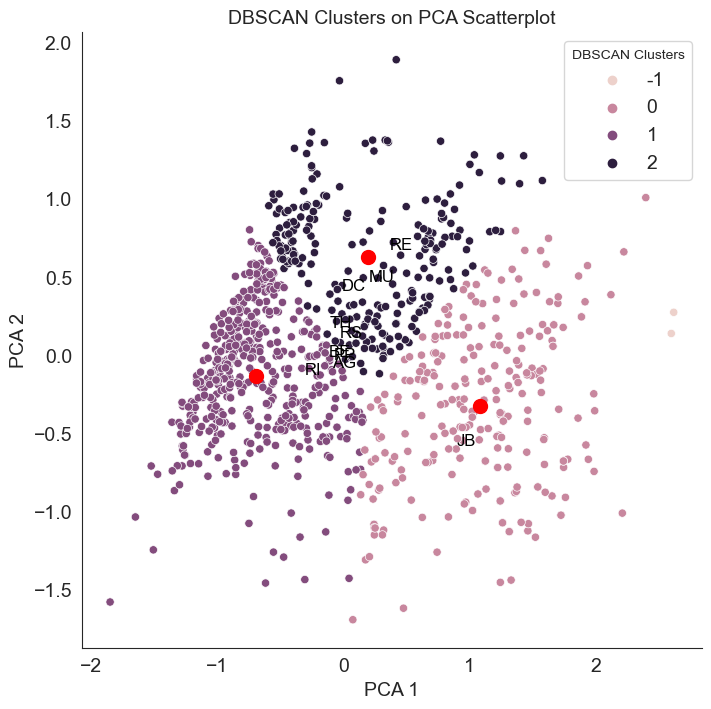

In [47]:
cluster_fig = plt.figure(figsize=(8, 8))
cluster_fig = sns.scatterplot(x='PCA 1', y='PCA 2', hue='DBSCAN Clusters', data=df_pca)
cluster_fig.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='r', label='Centroids')

coefficients = np.transpose(pca.components_[0:2, :])
n = coefficients.shape[0]
columns = list(df.columns)

for i in range(n):
	plt.text(coefficients[i, 0]*1.15, coefficients[i, 1]*1.15, columns[i], size='large', color='k', ha='center', va='center')
 
sns.despine()
cluster_fig.set_xlabel('PCA 1')
cluster_fig.set_ylabel('PCA 2')
cluster_fig.set_title('DBSCAN Clusters on PCA Scatterplot')
plt.show()

# Comparison of the algorithms

### Here we will compare the algorithms using the silhouette score.

In [55]:
df_without_clusters = df_pca.drop(['KMeans Clusters', 'Agnes Clusters', 'DBSCAN Clusters'], axis=1)

In [56]:
kmeans_silhouette = silhouette_score(df_without_clusters, kmeans.labels_)
agnes_silhouette = silhouette_score(df_without_clusters, agnes.labels_)
dbscan_silhouette = silhouette_score(df_without_clusters, dbscan.labels_)

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'Agnes Silhouette Score: {agnes_silhouette}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')

K-Means Silhouette Score: 0.3962303968150954
Agnes Silhouette Score: 0.3962303968150954
DBSCAN Silhouette Score: 0.37272782011599415


### Here we will compare the algorithms using the Calinski-Harabasz score.

In [57]:
kmeans_calinski = calinski_harabasz_score(df_without_clusters, kmeans.labels_)
agnes_calinski = calinski_harabasz_score(df_without_clusters, agnes.labels_)
dbscan_calinski = calinski_harabasz_score(df_without_clusters, dbscan.labels_)

print(f'K-Means Calinski-Harabasz Score: {kmeans_calinski}')
print(f'Agnes Calinski-Harabasz Score: {agnes_calinski}')
print(f'DBSCAN Calinski-Harabasz Score: {dbscan_calinski}')

K-Means Calinski-Harabasz Score: 906.0533759887828
Agnes Calinski-Harabasz Score: 906.0533759887828
DBSCAN Calinski-Harabasz Score: 616.9687623924654


In [58]:
kmeans_davies = davies_bouldin_score(df_without_clusters, kmeans.labels_)
agnes_davies = davies_bouldin_score(df_without_clusters, agnes.labels_)
dbscan_davies = davies_bouldin_score(df_without_clusters, dbscan.labels_)

print(f'K-Means Davies-Bouldin Score: {kmeans_davies}')
print(f'Agnes Davies-Bouldin Score: {agnes_davies}')
print(f'DBSCAN Davies-Bouldin Score: {dbscan_davies}')

K-Means Davies-Bouldin Score: 0.9339290344491425
Agnes Davies-Bouldin Score: 0.9339290344491425
DBSCAN Davies-Bouldin Score: 0.8061294984416566


# Conclusion

* *K-Means* and *Agnes* are the best algorithms to cluster our data. They have the best scores for all the metrics.
* *DBSCAN* is the worst algorithm to cluster our data. It has the worst scores for all the metrics.
* *PCA* is a good way to reduce the number of dimensions of our data. It allows us to have a better visualization of our data.